## **Hackathon: Fish Harvesting**

The logistic growth model

$$u'(t) = r*u(t)(1-u(t)/K)$$
can be used to model population growth.

Here $u(t)$ is the population, $r$ is the intrinsic growth rate of the species, and $K$ is the carrying capacity.

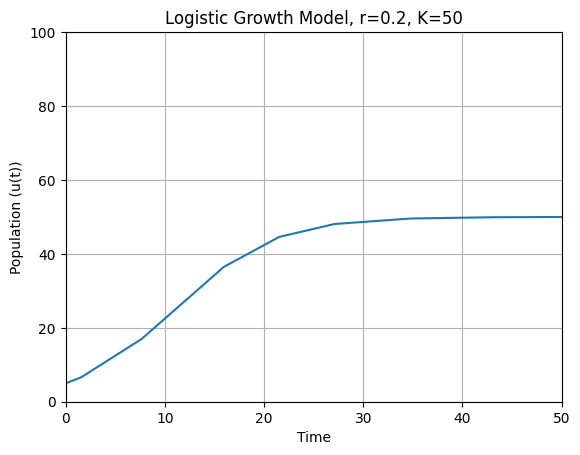

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
r = .2##choose a value, usually 0 < r < 1
K = 50##choose a value
u0 = 5##choose a value
#This code shows you how to use built-in functions
#in Python to solve an IVP
#make a function object for the derivative
def f_prime(t, u, r, K):
  return r * u * (1 - u / K)
#define a time interval
t_span = (0,50)
#solve_ivp is one of many built-in functions in Python you
#can use to solve an IVP
#inputs: function object, time interval, initial value, params
#output: sol object holds lots of info
sol = solve_ivp(f_prime, t_span, [u0], args=(r, K))
import matplotlib.pyplot as plt
plt.plot(sol.t, sol.y[0])
plt.xlabel('Time')
plt.ylabel('Population (u(t))')
plt.title('Logistic Growth Model, r={}, K={}'.format(r,K))
plt.ylim([0,100])
plt.xlim([0,50])
plt.grid(True)
plt.show()



In many scenarios, such as the fishing industry, the population is impacted by harvesting.

The logistic growth model with harvesting looks like

$$u'(t) = r*u(t)(1-u(t)/K)-h(t)*u(t).$$

Again, $u(t)$ represents the population, $r$ is the intrinsic growth rate of the species, $K$ is the carrying capacity, and $h(t)$ is the population harvesting rate.

This model assume that harvesting is proportional to the population, $u(t)$, but this is not always the case. The harvesting term can take different forms and $h(t)$ can be assumed to be a constant or a function of time as above.

Now suppose you are invested in the success of the fishing industry. Too much harvesting leads to collapse of the fish population, too little means not enough fish to sell. The model above could be used to  develop a business plan to ensure safety of the fish population and success of the industry.

Now if only you had some data to **fit** the model to what is really going on!

The estimated Atlantic cod biomass (in metric tons) and harvest rate $h(t)$ in Georges Bank from 1978 to 2008 are given in the Table below.

\begin{array}{|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\text{Year}~j & u_j & h_j & \text{Year}~j & u_j & h_j & \text{Year}~j & u_j & h_j \\
\hline
0 & 72,148 & 0.18847 & 10 & 68,702 & 0.23154 & 20 & 20,196 & 0.18953 \\
1 & 73,793 & 0.14974 & 11 & 61,191 & 0.20860 & 21 & 25,776 & 0.17011 \\
2 & 74,082 & 0.21921 & 12 & 49,599 & 0.33565 & 22 & 23,796 & 0.15660 \\
3 & 92,912 & 0.17678 & 13 & 46,266 & 0.29534 & 23 & 19,240 & 0.28179 \\
4 & 82,323 & 0.28203 & 14 & 34,877 & 0.33185 & 24 & 16,495 & 0.25287 \\
5 & 59,073 & 0.34528 & 15 & 28,827 & 0.35039 & 25 & 12,167 & 0.25542 \\
6 & 59,920 & 0.20655 & 16 & 21,980 & 0.28270 & 26 & 21,104 & 0.08103 \\
7 & 48,789 & 0.33819 & 17 & 17,463 & 0.19928 & 27 & 18,871 & 0.08739 \\
8 & 70,638 & 0.14724 & 18 & 18,057 & 0.18781 & 28 & 21,241 & 0.08195 \\
9 & 67,462 & 0.19757 & 19 & 22,681 & 0.19357 & 29 & 22,962 & 0.10518 \\
\hline
\end{array}

The table provides data points $u_j$ at times $t = t_j$ for $0 \leq j \leq n$.

Run the code cells below to create a dataframe and plot the population over time.

In [ ]:
#first we will make a dataframe to hold the data
import pandas as pd
#load data
data = """Year,u,h
0,72148,0.18847
1,73793,0.14974
2,74082,0.21921
3,92912,0.17678
4,82323,0.28203
5,59073,0.34528
6,59920,0.20655
7,48789,0.33819
8,70638,0.14724
9,67462,0.19757
10,68702,0.23154
11,61191,0.2086
12,49599,0.33565
13,46266,0.29534
14,34877,0.33185
15,28827,0.35039
16,21980,0.2827
17,17463,0.19928
18,18057,0.18781
19,22681,0.19357
20,20196,0.18953
21,25776,0.17011
22,23796,0.1566
23,19240,0.28179
24,16495,0.25287
25,12167,0.25542
26,21104,0.08103
27,18871,0.08739
28,21241,0.08195
29,22962,0.10518"""
#make the dataframe
from io import StringIO
df = pd.read_csv(StringIO(data))
print(df)


    Year      u        h
0      0  72148  0.18847
1      1  73793  0.14974
2      2  74082  0.21921
3      3  92912  0.17678
4      4  82323  0.28203
5      5  59073  0.34528
6      6  59920  0.20655
7      7  48789  0.33819
8      8  70638  0.14724
9      9  67462  0.19757
10    10  68702  0.23154
11    11  61191  0.20860
12    12  49599  0.33565
13    13  46266  0.29534
14    14  34877  0.33185
15    15  28827  0.35039
16    16  21980  0.28270
17    17  17463  0.19928
18    18  18057  0.18781
19    19  22681  0.19357
20    20  20196  0.18953
21    21  25776  0.17011
22    22  23796  0.15660
23    23  19240  0.28179
24    24  16495  0.25287
25    25  12167  0.25542
26    26  21104  0.08103
27    27  18871  0.08739
28    28  21241  0.08195
29    29  22962  0.10518


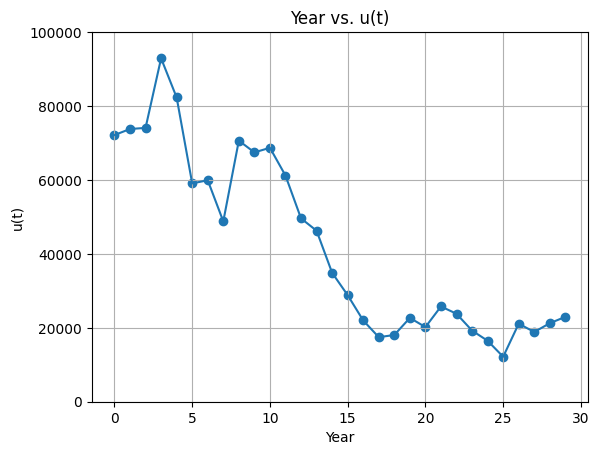

In [ ]:
#plot the data
import matplotlib.pyplot as plt
plt.plot(df['Year'], df['u'])
plt.scatter(df['Year'], df['u'])
plt.xlabel('Year')
plt.ylabel('u(t)')
plt.title('Year vs. u(t)')
plt.grid(True)
plt.ylim([0,100000])
plt.show()


**Your goal is to**

1.   **Estimate the parameters $r$ and $K$ in the model using this data.**
2.   **Produce a plot of the solution $u(t)$ with your fitted parameters on top of the given data.**

If we knew the function $u(t)$, we could form a sum of squares to determine how well any given choice of $r$ and $K$ fit the data. For example,
$$S(r,K) = \sum_{j=0}^n (u_j-u(t_j))^2$$

where $u_j$ is the observed value of the population at Year $j$ and $u(t_j)$ is the value of the population predicted by the model at Year $j$.

**Challenge: We know how the population $u(t)$ is changing, but we don't have the explicit function $u(t)$. What should we do?**

I will help write code to implement any steps you come up with, but I want you to try to come up with the steps on your own, i.e. write out a plan and think about what you want to compute at each step.




We know $u_j$ at 30 time points. So we can compute $u'_j$ using a forward difference approximation:
$$u_j' = \frac{u_{j+1}-u_j}{\Delta t_j}$$
where $\Delta t_j = 1$ for all $j$.

**Claim:** The foward difference approximation of the derivative should agree with the equation for the derivative at each $t_j$. Thus,

$$u'(t_j) = r*u_j*(1-u_j/K)-h_j*u_j.$$

So the two things we will compare to construct the sum of squares is:
$$S(r,K) = \sum_{j=0}^n (u_j'-u'(t_j,u_j,h_j,r,K))^2$$

In [ ]:
#forward difference approximations
forward_diff_vals = df['u'].values[1:]-df['u'].values[:-1]
#this function creates an array of u' values for a given r,K
change_vals = lambda r,K: r*df['u'].values[:-1]*(1-df['u'].values[:-1]/K)-df['h'].values[:-1]*df['u'].values[:-1]
#make some arrays for r and K
r_vals = np.linspace(.1, .5, 100)
k_vals = np.linspace(40000, 300000, 100)
#dataframe to store the sum of squares
sum_vals = np.zeros((len(r_vals), len(k_vals)))
#start looping through the r and K values
for i in range(len(r_vals)):
  r = r_vals[i];
  for j in range(len(k_vals)):
    K = k_vals[j];
    #compute the sum of squares
    sum_vals[i,j] = np.sum((forward_diff_vals-change_vals(r,K))**2)

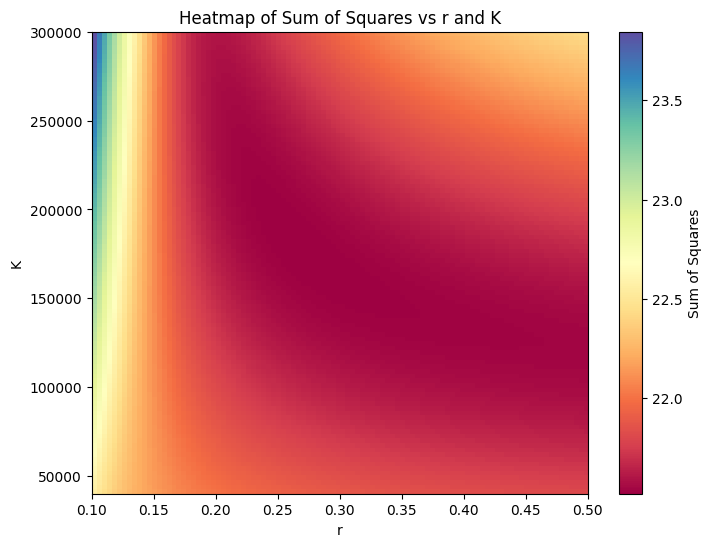

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(np.log(sum_vals), cmap='Spectral', origin='lower', extent=[r_vals.min(), r_vals.max(), k_vals.min(), k_vals.max()], aspect='auto')
plt.colorbar(label='Sum of Squares')

# Add labels and title
plt.xlabel('r')
plt.ylabel('K')
plt.title('Heatmap of Sum of Squares vs r and K')

# Display the plot
plt.show()


In [ ]:
#choose some sets of parameters using the heatmap above
#then write code that solves the ODE with those parameters using Euler's method.
#plot your numerical solution on top of the ODE.